
## Spring-Mass experiment 

Imagine that you are doing an experiment where you are measuring the elongation of a spring after adding some mass to of of its ends 
<div style="text-align:center">
    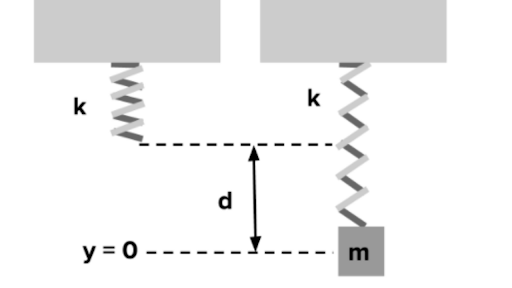
</div>

From this experiment, you are interested in learning the relationship between spring deformation ($d$) and the mass added at the end of the spring ($y$). You decide to add diferent $x_0$ and measure the resulting elongation.


|x_0   | y|
| -- | -- |
|0     | 0 |
|1| 2.5 |
|2| 6.8 |
|3| 9.0 |
|4| 12.8 |
|5| 14.2 |
|6| 18.5 |
|7| 21.0 |
|8| 23.9 |
|9| 27.5 |
|10| 29.2 |

<div style="text-align:center">
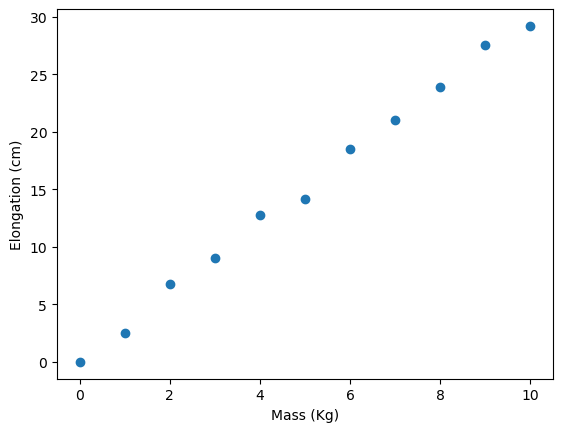
</div>

After you ran out of masses to try, you decide that the best course of action is to find a model that describes the elongation for a given mass. You briefly remember from highscool that the mass-deformation can be related by a _linear model_.


### Linear Model

A linear model relates independent variables (usually represented with $x$) with dependent variables (usually represented with $y$) using the following architecture 
$$
\hat{y} = \omega_0 + \omega_{1}x_{1} + \omega_{2}x_{2} + \cdots + \omega_{n}x_{n}
$$

where
- $\hat{y}$ is the value predicted by the model
- $\omega_{i}$ is the i-th parameter of the model 
- $x_{i}$ is the i-th independent variable or model feature

The objective is to given some measured data (such as the mass and displacement from our spring example), and a model arquitecture determine the model parameters that will make the model prediction ($\hat{y}$) close to the measured data ($y$). 

There are different ways to measure how close the measured and predicted data are. The most common approach is to compute the Root Mean Squared Error, given by 
$$
RMSE = \frac{1}{2N}\sum_{i=1}^{i=N}(\hat{y}[i] - y[i])^{2}
$$

which is simply the average squared difference between the model prediction and the measured data. 

## Estimating the model parameters 

The task now is to estimate the model parameters using some approach. 

### Random Guessing

One possibility is to randomly guess some values and see if they work...

The model that we will use has the form :
$$
\hat{y} = \omega_0 + \omega_1x_1
$$

From the measured data, we see that when $$x_0 = 0 \rightarrow \hat{y} =0$$ then $$\omega_0=0$$ The model is simplified to 


$$
\hat{y} =\omega_1x_1
$$

we can now try different values for $\omega_1$ and see how the work

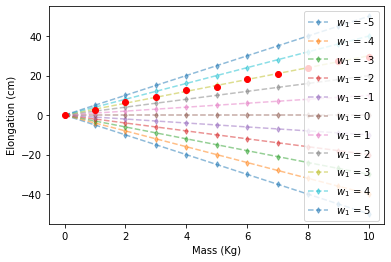

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
w_1_vals=np.arange(-5,6)
for w_1 in w_1_vals:
    y_hat = w_1*x
    plt.plot(x,y_hat, 'd--', markersize=4, alpha=0.5,label=f'$w_1$ = {np.round(w_1)}')
plt.plot(x,y, 'o', color='red')
plt.xlabel('Mass (Kg)')
plt.ylabel('Elongation (cm)')
plt.legend()
plt.show();

Clearly one of our guesses values works better than the others. The predicted values obtain for 

$$\omega_1 = 3$$ 

are pretty close to the measured data. Lets see the RMSE for these values 

No handles with labels found to put in legend.


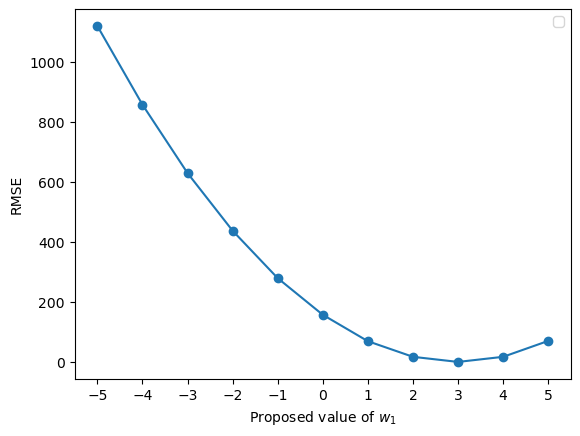

In [73]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
w_1_vals=np.arange(-5,6)
rmse = np.zeros_like(w_1_vals)
for idx,w_1 in enumerate(w_1_vals):
    y_hat = w_1*x
    rmse[idx] =(1/2)*np.mean((y_hat-y)**2)
plt.plot(w_1_vals,rmse,'o-')
plt.xlabel('Proposed value of $w_1$')
plt.ylabel('RMSE')
plt.xticks(w_1_vals)
plt.legend()
plt.show();

Clearly 

$$\omega_1 = 3$$ 

provides the lowest RMSE. 

We found the spring constant by randomly guessing values 👍 

.
.
.

not really, I knew the true value of the paramerter and choose a range of values that would work 😎


### Numerical Optimization 

Random guessing might be ok-ish for small scale problems, and is a solution often used by people with limited math background. A better approach is to use numerical optimization, so that we let the data to tell us what is the best value. 

_luckily_ the RMSE is a convex functio over the parameters... meaning that the function is the smallest for the optimal parameters. We can use that property to find 

$$
\omega \rightarrow rmse(y,\hat{y}) \text{ is the lowest} 
$$

##### Gradient descend

Gradient descend is an iterative optimization algorithm to find the values that minimaze (or maximize) a function. If the function is convex, then gradient descend is guarantee to determine the maximum (or minimum) or the function. 

The intuition behind gradiend descend is simple. You start with some random parameters (as we did before) and evaluate the RMSE. Then you compute the gradient of the rmse at that point and adjust your parameters towards the direction of the gradient. 


$$
\omega_{new} = \omega_{old} - \eta \frac{\partial (rmse(\omega_{old}))}{\partial \omega_{old}}
$$

- $\eta$ is known as learning rate, it is usually a small number that controls how fast we update the parameters
- If your random point is far away from the minimum, the grandient will be large and you will make a large adjustment to the parameters
- If your random point is close to the minumum, the gradient will be small and you will make a small adjustment to the parameters 




Lets check how this works using the spring example. 

$$
\begin{align}
&\hat{y} = \omega_{1}x_{1} \\
&rmse(\omega_{1}) = L(\omega_{1}) = \frac{1}{2N}\sum(\omega_{1}x_{1} - y)^2 \\
& \frac{\partial L(\omega_{1})}{\partial \omega_{1}} = \frac{1}{N}\sum((\omega_{1}x_{1} - y)*x_{1})
\end{align}
$$

For $\eta = 0.1$ we have

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display

def f(w_est):
    x = np.array([0,1,2,3,4,5,6,7,8,9,10])
    y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
    w_1_vals=np.arange(-10,15.5,0.5)
    rmse = np.zeros_like(w_1_vals)
    for idx,w_1 in enumerate(w_1_vals):
        y_hat = w_1*x
        rmse[idx] =(1/2)*np.mean((y_hat-y)**2)

    eta = 0.01
    w_est_new = w_est - eta*np.mean((w_est*x-y)*x)  #a random number
    

    plt.plot(w_1_vals,rmse)
    plt.plot(w_est, (1/2)*np.mean((y-w_est*x)**2), 'o', markersize = 10, label='Init value')
    plt.plot(w_est_new, (1/2)*np.mean((y-w_est_new*x)**2), 'o', markersize=10, label='updated value')
    plt.xlabel('$w_1$')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show();
    
interact(f, w_est=FloatSlider(min=-10, max=10, step=0.2, continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w_est', max=10.0, min=-10.0…

The effect of $\eta$


In [4]:
def f(w_est, eta):
    x = np.array([0,1,2,3,4,5,6,7,8,9,10])
    y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
    w_1_vals=np.arange(-10,15.5,0.5)
    rmse = np.zeros_like(w_1_vals)
    for idx,w_1 in enumerate(w_1_vals):
        y_hat = w_1*x
        rmse[idx] =(1/2)*np.mean((y_hat-y)**2)

    w_est_new = w_est - eta*np.mean((w_est*x-y)*x)  #a random number
    

    plt.plot(w_1_vals,rmse)
    plt.plot(w_est, (1/2)*np.mean((y-w_est*x)**2), 'o', markersize = 10, label='Init value')
    plt.plot(w_est_new, (1/2)*np.mean((y-w_est_new*x)**2), 'o', markersize=10, label='updated value')
    plt.xlabel('$w_1$')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show();
    
interact(f, w_est=FloatSlider(min=-10, max=10, step=0.2, continuous_update=False), eta=FloatSlider(min=0, max=0.1, step=0.005, continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w_est', max=10.0, min=-10.0…

The grandient descend algorithm. 

1. Start with a random values for your model parameters
2. Update the parameters using the grandient descend formula
3. Iterate until the estimated parameters stop changing 

in code, this looks like the following:

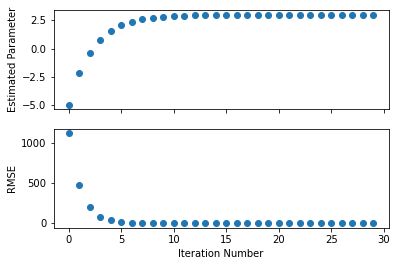

In [11]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
n_iterations = 30
w_init =-5#2*np.random.randn(1,1)[0][0]
eta = 0.01

L = np.zeros(n_iterations)
w_est = np.zeros(n_iterations)

w_est[0] = w_init
L[0] = (1/2)*np.mean((y-w_est[0]*x)**2)


for i in range(1,n_iterations):
    
    w_est[i] = w_est[i-1] - eta*np.mean((w_est[i-1]*x-y)*x)
    L[i] = (1/2)*np.mean((y-w_est[i]*x)**2)
    
fig,ax = plt.subplots(2,1, sharex = True)
ax[0].plot(range(0,n_iterations),w_est ,'o')
ax[0].set_ylabel('Estimated Parameter')
ax[1].plot(range(0,n_iterations),L ,'o')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Iteration Number')
plt.show();

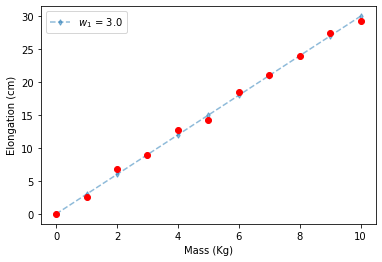

In [12]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
plt.plot(x,w_est[-1]*x, 'd--', markersize=4, alpha=0.5,label=f'$w_1$ = {np.round(w_est[-1])}')
plt.plot(x,y, 'o', color='red')
plt.xlabel('Mass (Kg)')
plt.ylabel('Elongation (cm)')
plt.legend()
plt.show();

We no longer have to guess values, the optimization procedure provides the best parameters for the model!

What if you have multiple parameters?

$$
\begin{align}
&\hat{y} = \omega_{0} + \omega_{1}x_{1} \\
&L(\omega_{0}, \omega_{1}) = \frac{1}{2N}\sum(\omega_{0} + \omega_{1}x_{1} - y)^2 \\
&\frac{\partial L(\omega_{0}, \omega_{1})}{\partial \omega_{0}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} - y)) \\
&\frac{\partial L(\omega_{0}, \omega_{1})}{\partial \omega_{1}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} - y)*x_{1})
\end{align}
$$

In code, this looks like:

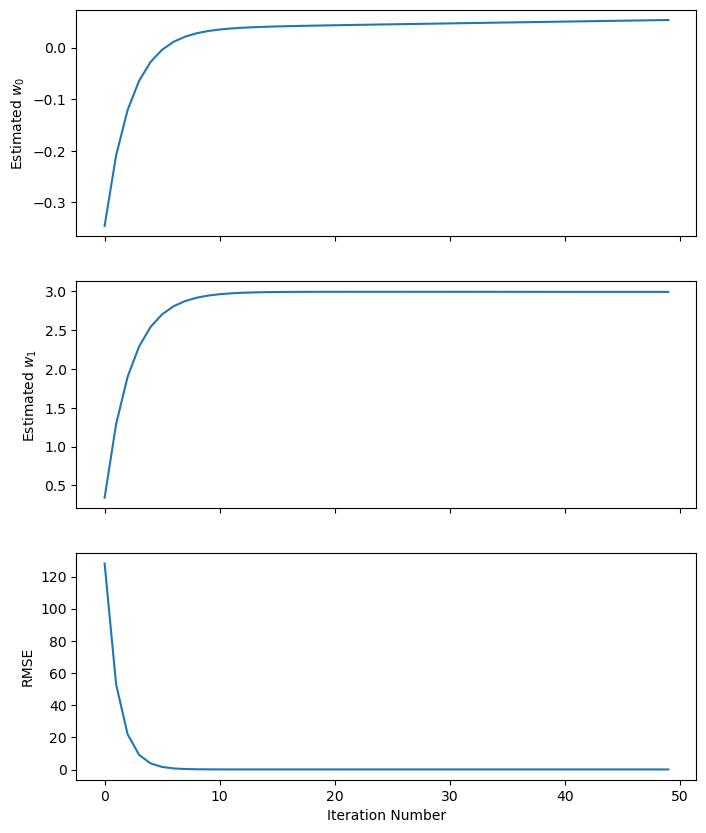

In [83]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
n_iterations = 50
w_init =np.random.randn(1,2)[0] #two random numbers
eta = 0.01

L = np.zeros(n_iterations)
w_est_1 = np.zeros(n_iterations)
w_est_0 = np.zeros(n_iterations)

w_est_1[0] = w_init[0]
w_est_0[0] = w_init[1]
L[0] = (1/2)*np.mean(((w_est_0[0] + w_est_1[0]*x) - y )**2)


for i in range(1,n_iterations):
    
    w_est_0[i] = w_est_0[i-1] - eta*np.mean(((w_est_0[i-1] + w_est_1[i-1]*x)-y))
    w_est_1[i] = w_est_1[i-1] - eta*np.mean(((w_est_0[i-1] + w_est_1[i-1]*x)-y)*x)
    L[i] = (1/2)*np.mean(((w_est_0[i] + w_est_1[i]*x) - y )**2)
    
fig,ax = plt.subplots(3,1, sharex = True, figsize=(8,10))
ax[0].plot(range(0,n_iterations),w_est_0)
ax[0].set_ylabel('Estimated $w_0$')
ax[1].plot(range(0,n_iterations),w_est_1)
ax[1].set_ylabel('Estimated $w_1$')
ax[2].plot(range(0,n_iterations),L)
ax[2].set_ylabel('RMSE')
ax[2].set_xlabel('Iteration Number')
plt.show();

What if we have more independent variables (called Multivariable Linear Model)

$$
\begin{align}
&\hat{y} = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2} \\
&L(\omega_{0}, \omega_{1}, \omega_{2}) = \frac{1}{2N}\sum(\omega_{0} + \omega_{1}x_{1} - y)^2 \\
&\frac{\partial L(\omega_{0}, \omega_{1}, \omega_{2})}{\partial \omega_{0}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} +\omega_{2}x_{2}- y)) \\
&\frac{\partial L(\omega_{0}, \omega_{1}, \omega_{2})}{\partial \omega_{1}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1}+\omega_{2}x_{2} - y)*x_{1}) \\
&\frac{\partial L(\omega_{0}, \omega_{1}, \omega_{2})}{\partial \omega_{2}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} +\omega_{2}x_{2}- y)*x_{2})
\end{align}
$$

as we add more variables, the code will become more complex and difficult to manage. Matrix notation helps to simplify the code and make it easier to manage. 

The equation 
$$
\hat{y} = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2}  + \cdots + \omega_{n}x_{n}
$$
can be written as

where
$$
\begin{bmatrix}
\hat{y}[0] \\
\hat{y}[1] \\
\hat{y}[2] \\
\vdots \\
\hat{y}[N]
\end{bmatrix} = \begin{bmatrix}
1 & x_{1}[0] & x_{2}[0] & \cdots & x_{n}[0] \\
1 & x_{1}[1] & x_{2}[1] & \cdots & x_{n}[1] \\
1 & x_{1}[2] & x_{2}[2] & \cdots & x_{n}[2] \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1}[N] & x_{2}[N] & \cdots & x_{n}[N] \\
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
w_{2} \\
\vdots \\
w_{n}
\end{bmatrix}
$$
or
$$
\hat{y} = X\boldsymbol\omega
$$

Using this notation, the rmse and its derivative becomes 
$$
\begin{align}
&L(\boldsymbol\omega) = \frac{1}{2N}\sum(X\boldsymbol\omega - y)^2 \\
&\frac{\partial L(\boldsymbol\omega)}{\partial \boldsymbol\omega} = \frac{1}{N}(X^{T}(X\boldsymbol\omega - y))
\end{align}
$$

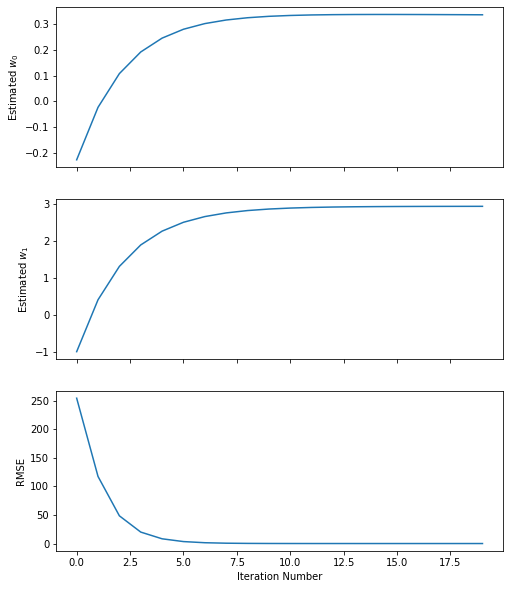

In [14]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([[0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2]]).T

#create X stacking column vectors
X = np.column_stack((np.ones_like(x),x))

n_iterations = 20
w_init =np.random.randn(2,1)
eta = 0.01

L = np.zeros(n_iterations)
w_est = np.zeros((2,n_iterations))

w_est[0,0] = w_init[0]
w_est[1,0] = w_init[1]
L[0] = (1/2)*np.mean((X@w_est[:,0] - y)**2)


for i in range(1,n_iterations):
    
    w_est[:,[i]] = w_est[:,[i-1]] - (1/len(x))*eta*((X.T)@(X@w_est[:,[i-1]]-y))
    L[i] = (1/2)*np.mean((X@w_est[:,[i]] - y)**2)

    
fig,ax = plt.subplots(3,1, sharex = True, figsize=(8,10))
ax[0].plot(range(0,n_iterations),w_est[0,:])
ax[0].set_ylabel('Estimated $w_0$')
ax[1].plot(range(0,n_iterations),w_est[1,:])
ax[1].set_ylabel('Estimated $w_1$')
ax[2].plot(range(0,n_iterations),L)
ax[2].set_ylabel('RMSE')
ax[2].set_xlabel('Iteration Number')
plt.show();

In [90]:
np.zeros((2,n_iterations))[:,[3]]

array([[0.],
       [0.]])

In [63]:
X@w_est[:,i-1].reshape(2,1) - y

array([[ 3.31732395e-02],
       [-4.06447748e+00],
       [-9.96212820e+00],
       [-1.37597789e+01],
       [-1.91574296e+01],
       [-2.21550804e+01],
       [-2.80527311e+01],
       [-3.21503818e+01],
       [-3.66480325e+01],
       [-4.18456832e+01],
       [-4.51433340e+01]])

In [30]:
w_est[:,0]

array([0., 0.])